<a href="https://colab.research.google.com/github/nityamshah/datascience/blob/main/unit7/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Polynomial models are good when the relationship in the data is more complicated where it might have multiple ups and downs and not just a simple linear relationship. However, you have to be careful when increasing the degree of the polynomial because that could lead to overfitting. In general, we still want to trend toward the simpler model that still fits our model better. But overall, polynomial elements give you flexibility for more complicated relationships.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

You would not want to include a polynomial element if your data's relationship is simpler or linear. Otherwise, you risk overcomplicating your model. Additionally you would not want to use a polynomial element if it's going to lead to too much overfitting. It could begin to capture noise and lose generalizability to new data beyond the training data if you put a polynomial element on a model that doesn't need it.

**Task3**:

What's the point of using b splines?

B splines give us the flexibility that comes from polynomial regressions but avoid the overfitting. So these are also good for smoothly modeling more complex relationships but without the difficulty of high degree polynomials.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A gaussian process is where every x value is a knot. Each point has its own polynomial regression and Gaussian Processes also take relationships to other knots (other data points) into account. They work better with more data. The kernel/covariance tells you how the points are related to eachother and also impacts the smoothness. The kernel captures if points are similar or how smooth the function needs to be.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a distributional model


In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-96gy_q12
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-96gy_q12
  Resolved https://github.com/pydata/xarray.git to commit 1189240b2631fa27dec0cbea76bf3cf977b42fce
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


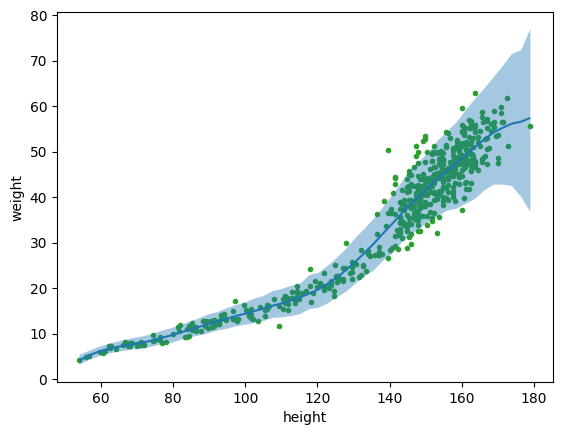

In [ ]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')

num_knots = 6
knots = np.linspace(howell.height.min(), howell.height.max(), num_knots+2)[1:-1]

#distributional model
formula_howell = bmb.Formula(
    "weight ~ bs(height, degree=3, knots=knots)",
    "sigma ~ height"
)

model_spline = bmb.Model(formula_howell, howell, family="gaussian")
idata_spline = model_spline.fit()

bmb.interpret.plot_predictions(model_spline, idata_spline, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

In the first model, if you don't specify a mean, it assumes that the mean of the GP is 0. This is why the model's co2 emissions predict a dip back down in the 2000s even though we know this is not true. You can fix this by introducing a custom changepoint mean function. If you don't want to choose where the changepoints are, you can use a covariance function which would also give you smoother transitions.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

My favorite graph is the predictions of CO2 in ppm over time with the changepoint coviarance model. I like this graph because it's realistic and incorporates different covariance functions over different intervals. It was able to conclude the possible outcomes for how CO2 emissions will change. It captures that the rate at which CO2 increases could increase, decrease, or change not linearly.